In [1]:
import pandas as pd

In [7]:
train_data = pd.read_csv(r'D:\ML Belajarrrr\TitanicKaggle\train.csv')

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

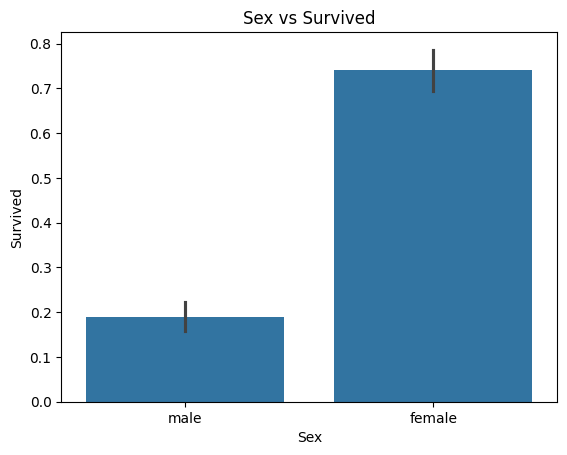

In [12]:
sns.barplot(x='Sex', y='Survived', data=train_data)

plt.title('Sex vs Survived')
plt.show()

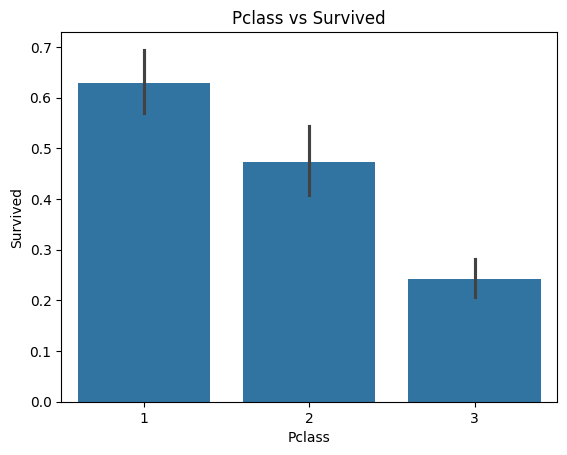

In [13]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

plt.title('Pclass vs Survived')
plt.show()

C:\Users\HELWA\AppData\Local\Temp\ipykernel_22856\3164844602.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(survived['Age'].dropna(), label='Selamat', shade=True)
C:\Users\HELWA\AppData\Local\Temp\ipykernel_22856\3164844602.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(not_survived['Age'].dropna(), label='Tidak Selamat', shade=True)


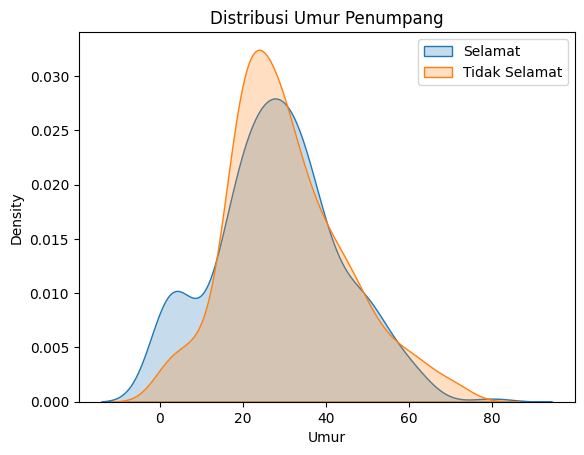

In [14]:
# Memisahkan data yang selamat dan tidak
survived = train_data[train_data['Survived'] == 1]
not_survived = train_data[train_data['Survived'] == 0]

sns.kdeplot(survived['Age'].dropna(), label='Selamat', shade=True)
sns.kdeplot(not_survived['Age'].dropna(), label='Tidak Selamat', shade=True)
plt.xlabel('Umur')
plt.title('Distribusi Umur Penumpang')
plt.legend()
plt.show()


In [15]:
train_data.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [16]:
import plotly.express as px # Library untuk membuat grafik interaktif.
# Memberikan kontrol penuh atas setiap elemen grafik (judul, label sumbu, ukuran font, warna garis).
import matplotlib
import matplotlib.pyplot as plt
# Membuat grafik statistik yang kompleks (seperti heatmap, boxplot, atau violin plot) hanya dengan sedikit baris kode.
import seaborn as sns
# Magic Command yang digunakan untuk memastikan agar grafik yang dibuat langsung muncul di bawah baris kode
%matplotlib inline

In [17]:
fig_sex = px.histogram(train_data,
                       marginal='box',
                       x='Sex',
                       nbins=47,
                       title='Distribution of Sex')
fig_sex.update_layout(bargap=0.1)
fig_sex.show()

In [18]:
train_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
fig_age = px.histogram(train_data,
                       marginal='box',
                       x='Age',
                       nbins=47,
                       title='Distribution of Age')
fig_age.update_layout(bargap=0.1)
fig_age.show()

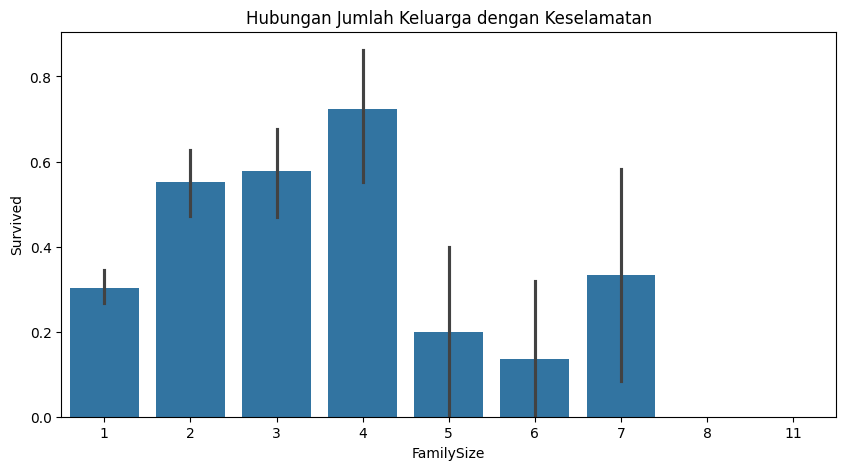

In [21]:
# Menambahkan kolom baru untuk mengukur ukuran keluarga yang ikut
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Visualisasi hubungan ukuran keluarga dengan keselamatan
plt.figure(figsize=(10, 5))
sns.barplot(x='FamilySize', y='Survived', data=train_data)
plt.title('Hubungan Jumlah Keluarga dengan Keselamatan')
plt.show()

In [23]:
fig_famsize = px.histogram(train_data,
                       marginal='box',
                       x='FamilySize',
                       y='Survived',
                       nbins=47,
                       title='Distribution of Family Size')
fig_famsize.update_layout(bargap=0.1)
fig_famsize.show()

In [24]:
fig_famsize = px.histogram(train_data,
                       marginal='box',
                       x='FamilySize',
                       y='Survived',
                       histfunc='avg', # <--- Menampilkan peluang (0-1), bukan sekadar jumlah orang
                       title='Peluang Selamat Berdasarkan Ukuran Keluarga')

# Agar angka di sumbu X lebih rapi (menunjukkan angka 1, 2, 3...)
fig_famsize.update_layout(bargap=0.1, xaxis_type='category')
fig_famsize.show()

In [25]:
train_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [27]:
fig_fare = px.histogram(train_data,
                       marginal='box',
                       x='Fare',
                       y='Survived',
                       nbins=47,
                       title='Distribution of Fare')
fig_fare.update_layout(bargap=0.1)
fig_fare.show()

In [28]:
fig_fare = px.histogram(train_data,
                       marginal='box',
                       x='Fare',
                       y='Survived',
                       histfunc='avg', # <--- Menampilkan peluang (0-1), bukan sekadar jumlah orang
                       title='Peluang Selamat Berdasarkan Ukuran Keluarga')

# Agar angka di sumbu X lebih rapi (menunjukkan angka 1, 2, 3...)
fig_fare.update_layout(bargap=0.1, xaxis_type='category')
fig_fare.show()

### **Memperbaiki Data yang Hilang**

In [29]:
# Mengecek jumlah data kosong di setiap kolom
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_size      0
FamilySize       0
dtype: int64


In [30]:
train_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
# Mengambil nilai pertama dari hasil modus
nilai_modus_age = train_data['Age'].mode()[0]

print(f"Modus dari kolom Age adalah: {nilai_modus_age}")

Modus dari kolom Age adalah: 24.0


Penjelasan: Gunakan Modus untuk kolom yang berisi label/kata (seperti Sex atau Embarked), dan gunakan Median/Mean untuk kolom yang berisi angka (seperti Age atau Fare)

1. Terdapat 3 jenis data yang hilang
2. Age memiliki 177 data yang hilang. Oleh karena itu, menggunakan mean atau median, age tidak bisa menggunakan modus dikarenakan nilai modusnya adalah 24 ini bisa menyebabkan bias. Model akan berfokus pada modus nantinya.
3. Cabin memiliki 678 data yang hilang. Oleh karena itu, sebaiknya mengisinya dengan label 'Unknown'.
4. Embarked memiliki 2 data yang hilang. Oleh karena itu, kolom ini sebaiknya menggunakan modus untuk mengisi data NaN.

In [34]:
# Mengisi NaN data Age dengan median Age
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

# Mengisi NaN data dari Cabin dengan menggunakan label lainnya
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')

# Mencari pelabuhan yang paling sering muncul
most_freq_port = train_data.Embarked.mode()[0]

# Mengisi NaN dengan pelabuhan tersebut
train_data['Embarked'] = train_data['Embarked'].fillna(most_freq_port)

In [35]:
# Status Akhir Data 
print('Cek Status Kosong')
train_data.isnull().sum()

Cek Status Kosong


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Family_size    0
FamilySize     0
dtype: int64

### **Encoding**

In [36]:
# Membagi data menjadi 2 bagian yaitu numerik dan kategorikal

# 1. Data numerik
numeric_cols = train_data.select_dtypes(include=['number']).columns.tolist()

# 2. Data kategorikal
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

print('Data Numerik: ', numeric_cols)
print('Data Kategorikal: ', categorical_cols)

Data Numerik:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_size', 'FamilySize']
Data Kategorikal:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [37]:
train_data[categorical_cols].nunique()

Name        891
Sex           2
Ticket      681
Cabin       148
Embarked      3
dtype: int64

In [38]:
# Untuk Jenis Data Sex
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])

**Strategi One Hot Encoding**

1. Sex & Embarked: Di-encode karena itu adalah Kategori Kelompok (Grup).

2. Name, Ticket, PassengerId: Dibuang karena itu adalah Identitas Unik (tidak membentuk pola kelompok).

3. Cabin: Dibuang atau diolah khusus karena Data Hilang terlalu banyak.

In [39]:
# Untuk data yang memiliki jenis lebih dari dua
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Sex', 'Embarked']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

ct = ColumnTransformer(
    transformers=[
        ('onehot', encoder, categorical_features)
    ],
    remainder='passthrough'
)

train_encoded_array = ct.fit_transform(train_data)

column_names = ct.get_feature_names_out()
train_final = pd.DataFrame(train_encoded_array, columns=column_names)

print("Hasil One-Hot Encoding:")
print(train_final.head())

Hasil One-Hot Encoding:
  onehot__Sex_0 onehot__Sex_1 onehot__Embarked_C onehot__Embarked_Q  \
0           0.0           1.0                0.0                0.0   
1           1.0           0.0                1.0                0.0   
2           1.0           0.0                0.0                0.0   
3           1.0           0.0                0.0                0.0   
4           0.0           1.0                0.0                0.0   

  onehot__Embarked_S remainder__PassengerId remainder__Survived  \
0                1.0                      1                   0   
1                0.0                      2                   1   
2                1.0                      3                   1   
3                1.0                      4                   1   
4                1.0                      5                   0   

  remainder__Pclass                                    remainder__Name  \
0                 3                            Braund, Mr. Owen Harris  

In [40]:
# Menghapus kolom identitas unik
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_data_cleaned = train_data.drop(columns=cols_to_drop)

print("Kolom yang tersisa untuk dipelajari model:")
print(train_data_cleaned.columns.tolist())

Kolom yang tersisa untuk dipelajari model:
['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family_size', 'FamilySize']


In [47]:
train_data_cleaned2 = train_data_cleaned.drop(columns='Family_size')

In [48]:
train_data_cleaned2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,S,2
1,1,1,0,38.0,1,0,71.2833,C,2
2,1,3,0,26.0,0,0,7.9250,S,1
3,1,1,0,35.0,1,0,53.1000,S,2
4,0,3,1,35.0,0,0,8.0500,S,1


In [49]:
train_data_cleaned2.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.904602
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,11.000000


### **Training Model**

In [ ]:
from sklearn.model_selection import train_test_split

In [51]:
y = train_data_cleaned2['Survived']
X = train_data_cleaned2.drop(columns=['Survived'])
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)



print("\nBentuk data fitur (X):")
print(X.head())


Bentuk data fitur (X):
   Pclass   Age  SibSp  Parch     Fare  FamilySize  Sex_1  Embarked_Q  \
0       3  22.0      1      0   7.2500           2   True       False   
1       1  38.0      1      0  71.2833           2  False       False   
2       3  26.0      0      0   7.9250           1  False       False   
3       1  35.0      1      0  53.1000           2  False       False   
4       3  35.0      0      0   8.0500           1   True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [52]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 80% untuk latihan (train) dan 20% untuk validasi (test mandiri)
# X adalah fitur (data tanpa kolom Survived)
# y adalah target (kolom Survived saja)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total data train awal: {len(X)}")
print(f"Data digunakan untuk Latihan (X_train): {len(X_train)}")
print(f"Data digunakan untuk Validasi (X_val): {len(X_val)}")

Total data train awal: 891
Data digunakan untuk Latihan (X_train): 712
Data digunakan untuk Validasi (X_val): 179


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Inisialisasi Model
# n_estimators: jumlah "pohon" di hutan (semakin banyak biasanya semakin bagus tapi lambat)
# max_depth: kedalaman pohon (agar tidak terlalu menghafal/overfit)
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# 2. Melatih Model dengan data training
model.fit(X_train, y_train)

# 3. Menebak data validasi (data yang tadi kita simpan 20%)
y_pred = model.predict(X_val)

# 4. Hitung Skor Akurasi
accuracy = accuracy_score(y_val, y_pred)

print(f"Akurasi Model di Data Validasi: {accuracy * 100:.2f}%")

Akurasi Model di Data Validasi: 81.01%


In [57]:
# 1. Load data test asli dari Kaggle
test_data = pd.read_csv(r'D:\ML Belajarrrr\TitanicKaggle\test.csv')

# 2. Simpan PassengerId untuk file submission nanti
passenger_ids = test_data['PassengerId']

# 3. --- PENTING: Lakukan Feature Engineering yang SAMA ---
# Kita harus buat FamilySize juga di data test
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# 4. Perbaikan Data (Imputasi)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

# 5. --- PENTING: Mapping Sex harus SAMA ---
# Karena tadi di train kamu pakai .map dulu baru get_dummies, di sini juga harus sama
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# 6. Hapus Kolom yang tidak diperlukan
test_data_cleaned = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# 7. Encoding (Gunakan kolom yang sama dengan X saat training)
X_test_Kaggle = pd.get_dummies(test_data_cleaned, columns=['Sex', 'Embarked'], drop_first=True)

# 8. --- PENYELAMAT: Sinkronisasi Kolom ---
# Kode ini memastikan urutan dan nama kolom di data test 
# SAMA PERSIS dengan data X saat kamu melatih model (fit)
X_test_Kaggle = X_test_Kaggle.reindex(columns=X.columns, fill_value=0)

# 9. PREDIKSI (Sekarang AI sudah paham soalnya)
predictions = model.predict(X_test_Kaggle)

# 10. BUAT FILE SUBMISSION
submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": predictions
})

submission.to_csv('my_submission.csv', index=False)
print("Berhasil! File 'my_submission.csv' sudah siap di-upload ke Kaggle.")

Berhasil! File 'my_submission.csv' sudah siap di-upload ke Kaggle.
